# Image Registration using OpenCV

**Image registration is a digital image processing technique that helps us align different images of the same scene. For instance, one may click the picture of a book from various angles.**

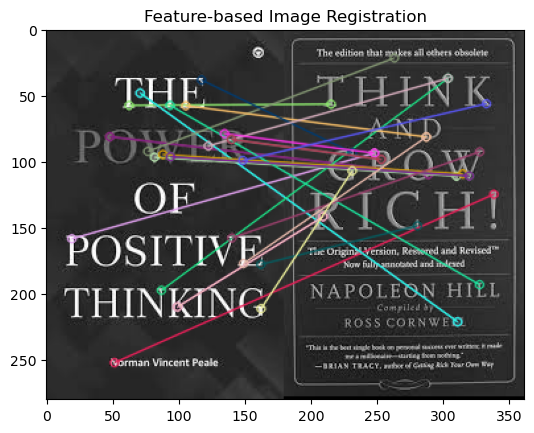

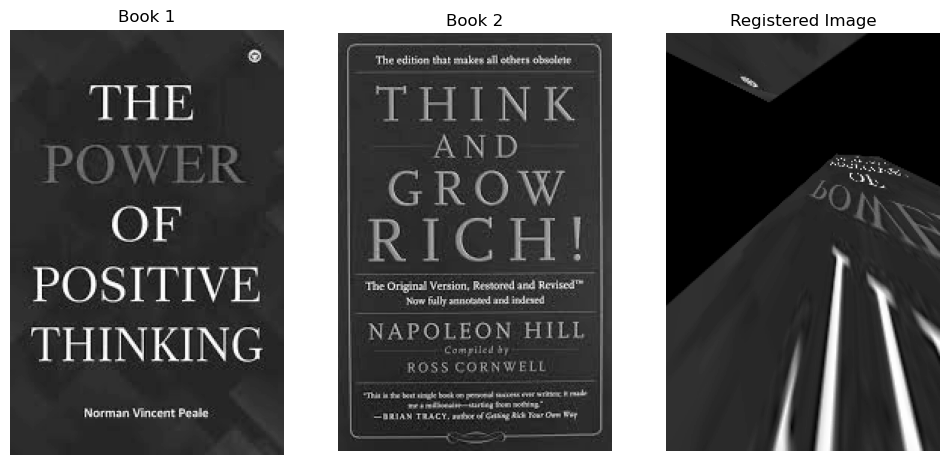

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images to be registered
image_path1 = 'D:\ST\Pictures/Book1.jpg'  # Replace with the actual path to your first image
image_path2 = 'D:\ST\Pictures/Book2.jpg'  # Replace with the actual path to your second image

img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# Detect keypoints and extract descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Brute-force feature matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(img_matches)
plt.title('Feature-based Image Registration')
plt.show()

# Extract corresponding points from good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Calculate the homography matrix
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the images using the homography matrix
registered_image = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

# Display the registered image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Book 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Book 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(registered_image, cmap='gray')
plt.title('Registered Image')
plt.axis('off')

plt.show()
